## 📌 Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np

In [2]:
from scipy import stats
#from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [3]:
import scripts.local_tools as lt
import scripts.telecomx_analysis as ta

In [4]:
pd.set_option('display.max_columns', None)

## 📌 Extracão

### Extração dos dados

In [5]:
path_json_data = 'https://raw.githubusercontent.com/jpierre06/challenge2-data-science/main/TelecomX_Data.json'

In [6]:
df = ta.carregar_dados_telecomx_normalizado(path_json_data)

In [7]:
#lt.save_profile_report(df, "./report/telecom_data_report_before", title="Relatório de Análise de Dados da Telecom X - Antes do tratamento de dados")

## 🔧 Transformação

### Tipo de dados

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

### Identificar colunas valores categóricos

In [9]:
colunas_categoricas = ta.extrair_colunas_categoricas(df, 5)


Coluna: Churn. Quantidade de domínios: 3. Valores do domínios: ['' 'No' 'Yes']

Coluna: customer_gender. Quantidade de domínios: 2. Valores do domínios: ['Female' 'Male']

Coluna: customer_SeniorCitizen. Quantidade de domínios: 2. Valores do domínios: [0 1]

Coluna: customer_Partner. Quantidade de domínios: 2. Valores do domínios: ['No' 'Yes']

Coluna: customer_Dependents. Quantidade de domínios: 2. Valores do domínios: ['No' 'Yes']

Coluna: phone_PhoneService. Quantidade de domínios: 2. Valores do domínios: ['No' 'Yes']

Coluna: phone_MultipleLines. Quantidade de domínios: 3. Valores do domínios: ['No' 'No phone service' 'Yes']

Coluna: internet_InternetService. Quantidade de domínios: 3. Valores do domínios: ['DSL' 'Fiber optic' 'No']

Coluna: internet_OnlineSecurity. Quantidade de domínios: 3. Valores do domínios: ['No' 'No internet service' 'Yes']

Coluna: internet_OnlineBackup. Quantidade de domínios: 3. Valores do domínios: ['No' 'No internet service' 'Yes']

Coluna: internet_De

### Identificar colunas valores numericos

In [10]:
colunas_numericas = ta.extrair_colunas_numericas(df, colunas_categoricas, ['customerID'])

['customer_tenure', 'account_Charges_Total', 'account_Charges_Monthly']


In [11]:
for c in colunas_numericas:
    print(f'Coluna: {c}. Valores: {np.unique(df[c])}\n')

Coluna: customer_tenure. Valores: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]

Coluna: account_Charges_Total. Valores: [' ' '100.2' '100.25' ... '999.45' '999.8' '999.9']

Coluna: account_Charges_Monthly. Valores: [ 18.25  18.4   18.55 ... 118.6  118.65 118.75]



### Tratamento de valores inválidos

In [12]:
df = ta.tratar_valores_invalidados(df)


Valores inválidos coluna Churn: 224

Valores inválidos coluna account_Charges_Total: 11

Valores inválidos coluna Churn: 0

Valores inválidos coluna account_Charges_Total: 0

Clientes sem serviços de Telefone e Internet contratados: 0

Clientes com múltiplas linhas de Telefone sem serviço de Telefone contratado: 0


### Tratamento de dados de colunas com valores binários

In [13]:
df, colunas_valores_binarios = ta.tratar_colunas_valores_binarios(df)

Coluna: Churn. Quantidade de domínios: 2. Valores do domínios: [0 1]

Coluna: customer_SeniorCitizen. Quantidade de domínios: 2. Valores do domínios: [0 1]

Coluna: customer_Partner. Quantidade de domínios: 2. Valores do domínios: [0 1]

Coluna: customer_Dependents. Quantidade de domínios: 2. Valores do domínios: [0 1]

Coluna: phone_PhoneService. Quantidade de domínios: 2. Valores do domínios: [0 1]

Coluna: phone_MultipleLines. Quantidade de domínios: 2. Valores do domínios: [0 1]

Coluna: internet_InternetService. Quantidade de domínios: 2. Valores do domínios: [0 1]

Coluna: internet_OnlineSecurity. Quantidade de domínios: 2. Valores do domínios: [0 1]

Coluna: internet_OnlineBackup. Quantidade de domínios: 2. Valores do domínios: [0 1]

Coluna: internet_DeviceProtection. Quantidade de domínios: 2. Valores do domínios: [0 1]

Coluna: internet_TechSupport. Quantidade de domínios: 2. Valores do domínios: [0 1]

Coluna: internet_StreamingTV. Quantidade de domínios: 2. Valores do domín

### Conversão de tipo de dados

In [14]:
df = lt.convert_types(df, ['account_Charges_Total'], ['float'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customerID                    7267 non-null   object 
 1   Churn                         7267 non-null   int64  
 2   customer_gender               7267 non-null   object 
 3   customer_SeniorCitizen        7267 non-null   int64  
 4   customer_Partner              7267 non-null   int64  
 5   customer_Dependents           7267 non-null   int64  
 6   customer_tenure               7267 non-null   int64  
 7   phone_PhoneService            7267 non-null   int64  
 8   phone_MultipleLines           7267 non-null   int64  
 9   internet_InternetService      7267 non-null   int64  
 10  internet_OnlineSecurity       7267 non-null   int64  
 11  internet_OnlineBackup         7267 non-null   int64  
 12  internet_DeviceProtection     7267 non-null   int64  
 13  int

### Criação de colunas derivadas dos dados

In [16]:
df = ta.criar_colunas_derivadas(df)

### Criar bases separadas de Churn

In [17]:
# Separando os grupos de chrun
df_yes = df[df['Churn'] == 1]
df_no = df[df['Churn'] == 0]

## 📊 Carga e análise

### Análise descritiva dos dados

In [18]:
df_yes[colunas_valores_binarios].describe().T[['count', 'mean', 'std']]

,count,mean,std
Churn,1869.0,1.000000,0.000000
customer_SeniorCitizen,1869.0,0.254682,0.435799
customer_Partner,1869.0,0.357945,0.479524
customer_Dependents,1869.0,0.174425,0.379576
phone_PhoneService,1869.0,0.909042,0.287626
phone_MultipleLines,1869.0,0.454789,0.498085
internet_InternetService,1869.0,0.939540,0.238401
internet_OnlineSecurity,1869.0,0.157838,0.364687
internet_OnlineBackup,1869.0,0.279829,0.449035
internet_DeviceProtection,1869.0,0.291600,0.454621


In [19]:
lt.describe_full_df(df_yes[['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total']])

,customer_tenure,account_Charges_Monthly,account_Charges_Total
count,1869,1869,1869
count_zero,0,0,0
count_nonzero,1869,1869,1869
count_unique,72,910,1732
mean,17.979133,74.441332,1531.796094
median,10.0,79.65,703.55
mode,1,74.4,20.2
mode_lists,[1],[74.4],[20.2]
mode_count,380,13,6
min,1,18.85,18.85


### Análise de Churn por categoria

In [20]:
ta.calcular_percentual_churn_categoria(df, 'customer_gender')

,customer_gender,customer,perc_total_customer,churn,perc_churn_customer
0,Female,3592,49.43,939,26.14
1,Male,3675,50.57,930,25.31


In [21]:
ta.calcular_percentual_churn_categoria(df, 'customer_tenure_bins')

,customer_tenure_bins,customer,perc_total_customer,churn,perc_churn_customer
0,000-005,1421,19.55,744,52.36
1,006-011,725,9.98,255,35.17
2,012-017,580,7.98,191,32.93
3,018-023,489,6.73,118,24.13
4,024-029,469,6.45,101,21.54
5,030-035,439,6.04,92,20.96
6,036-041,373,5.13,79,21.18
7,042-047,395,5.44,67,16.96
8,048-053,429,5.90,64,14.92
9,054-059,419,5.77,59,14.08


In [22]:
ta.calcular_percentual_churn_categoria(df, 'customer_SeniorCitizen')

,customer_SeniorCitizen,customer,perc_total_customer,churn,perc_churn_customer
0,0,6085,83.73,1393,22.89
1,1,1182,16.27,476,40.27


In [23]:
ta.calcular_percentual_churn_categoria(df, 'customer_Partner')

,customer_Partner,customer,perc_total_customer,churn,perc_churn_customer
0,0,3749,51.59,1200,32.01
1,1,3518,48.41,669,19.02


In [24]:
ta.calcular_percentual_churn_categoria(df, 'customer_Dependents')

,customer_Dependents,customer,perc_total_customer,churn,perc_churn_customer
0,0,5086,69.99,1543,30.34
1,1,2181,30.01,326,14.95


In [25]:
ta.calcular_percentual_churn_categoria(df, 'additional_InternetService')

,additional_InternetService,customer,perc_total_customer,churn,perc_churn_customer
0,0,2302,31.68,475,20.63
1,1,994,13.68,442,44.47
2,2,1058,14.56,370,34.97
3,3,1149,15.81,306,26.63
4,4,885,12.18,190,21.47
5,5,588,8.09,71,12.07
6,6,291,4.00,15,5.15


In [26]:
ta.calcular_percentual_churn_categoria(df, 'only_PhoneService')

,only_PhoneService,customer,perc_total_customer,churn,perc_churn_customer
0,0,5686,78.24,1756,30.88
1,1,1581,21.76,113,7.15


In [27]:
ta.calcular_percentual_churn_categoria(df, 'only_InternetService')

,only_InternetService,customer,perc_total_customer,churn,perc_churn_customer
0,0,6560,90.27,1699,25.90
1,1,707,9.73,170,24.05


In [28]:
ta.calcular_percentual_churn_categoria(df, 'both_Phone_InternetService')

,both_Phone_InternetService,customer,perc_total_customer,churn,perc_churn_customer
0,0,2288,31.48,283,12.37
1,1,4979,68.52,1586,31.85


In [29]:
ta.calcular_percentual_churn_categoria(df, 'account_Contract')

,account_Contract,customer,perc_total_customer,churn,perc_churn_customer
0,Month-to-month,4005,55.11,1655,41.32
1,One year,1519,20.90,166,10.93
2,Two year,1743,23.99,48,2.75


In [30]:
ta.calcular_percentual_churn_categoria(df, 'account_Contract_Month')

,account_Contract_Month,customer,perc_total_customer,churn,perc_churn_customer
0,0,3262,44.89,214,6.56
1,1,4005,55.11,1655,41.32


In [31]:
ta.calcular_percentual_churn_categoria(df, 'account_PaperlessBilling')

,account_PaperlessBilling,customer,perc_total_customer,churn,perc_churn_customer
0,0,2956,40.68,469,15.87
1,1,4311,59.32,1400,32.48


In [32]:
ta.calcular_percentual_churn_categoria(df, 'account_PaymentMethod')

,account_PaymentMethod,customer,perc_total_customer,churn,perc_churn_customer
0,Bank transfer (automatic),1589,21.87,258,16.24
1,Credit card (automatic),1568,21.58,232,14.80
2,Electronic check,2445,33.65,1071,43.80
3,Mailed check,1665,22.91,308,18.50


In [33]:
ta.calcular_percentual_churn_categoria(df, 'Churn')

,Churn,customer,perc_total_customer,churn,perc_churn_customer
0,0,5398,74.28,0,0.0
1,1,1869,25.72,1869,100.0


In [34]:
# Exemplo com 'account_Charges_Monthly'
print("Custo Mensal - Estatísticas por grupo:")
display(df.groupby('Churn')['account_Charges_Monthly'].describe())

# Exemplo com 'customer_tenure'
print("\nTenure (meses) - Estatísticas por grupo:")
display(df.groupby('Churn')['customer_tenure'].describe())

Custo Mensal - Estatísticas por grupo:


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,5398.0,61.354224,31.105006,18.25,25.10,64.50,88.6375,118.75
1,1869.0,74.441332,24.666053,18.85,56.15,79.65,94.2000,118.35



Tenure (meses) - Estatísticas por grupo:


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,5398.0,37.321045,24.178367,0.0,14.0,37.0,61.0,72.0
1,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


#### 4. Teste estatístico: Comparação entre grupos
Podemos usar o teste t independente (se os dados forem aproximadamente normais) ou o teste Mann-Whitney U (mais robusto para dados não normais).

In [35]:
# Valores dos dois grupos
charges_yes = df_yes['account_Charges_Monthly']
charges_no = df_no['account_Charges_Monthly']

# Teste t
t_stat, p_val = stats.ttest_ind(charges_yes, charges_no, nan_policy='omit')
print(f"\nTeste t para account_Charges_Monthly: t={t_stat:.2f}, p={p_val:.4f}")

# Teste de Mann-Whitney U
u_stat, p_val = stats.mannwhitneyu(charges_yes, charges_no)
print(f"Teste Mann-Whitney para account_Charges_Monthly: U={u_stat:.2f}, p={p_val:.4f}")


Teste t para account_Charges_Monthly: t=16.48, p=0.0000
Teste Mann-Whitney para account_Charges_Monthly: U=6252996.00, p=0.0000


In [36]:
tenure_yes = df_yes['customer_tenure']
tenure_no = df_no['customer_tenure']

# Teste t
t_stat, p_val = stats.ttest_ind(tenure_yes, tenure_no, nan_policy='omit')
print(f"\nTeste t para customer_tenure: t={t_stat:.2f}, p={p_val:.4f}")

# Teste de Mann-Whitney U
u_stat, p_val = stats.mannwhitneyu(tenure_yes, tenure_no)
print(f"Teste Mann-Whitney para customer_tenure: U={u_stat:.2f}, p={p_val:.4f}")


Teste t para customer_tenure: t=-31.23, p=0.0000
Teste Mann-Whitney para customer_tenure: U=2657380.50, p=0.0000


#### 📊 Interpretação dos resultados

| Metrica | O que significa       |
| ---------------------------------- | ----------------------------------------------------------- |
| Média/mediana maior no grupo "Yes" | Cliente com essa característica tende a cancelar mais       |    
| p-valor < 0.05                     | Há diferença estatisticamente significativa entre os grupos |
| p-valor ≥ 0.05                     | Não há forte evidência de diferença entre os grupos         |

### Salvar relatório de análise de dados após tratamento

In [37]:
#lt.save_profile_report(df, "./report/telecom_data_report_after", title="Relatório de Análise de Dados da Telecom X - Depois do tratamento de dados")

In [38]:
#df[['customerID', 'account_Charges_Monthly', 'account_Charges_Total', 'customer_tenure']].to_csv('./test/numerical.csv', index=False)

## 📄Relatorio Final

In [39]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

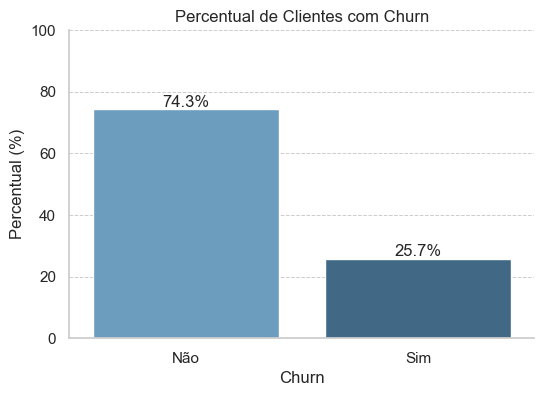

In [40]:
ta.graf_percentual_chrun(df).show()

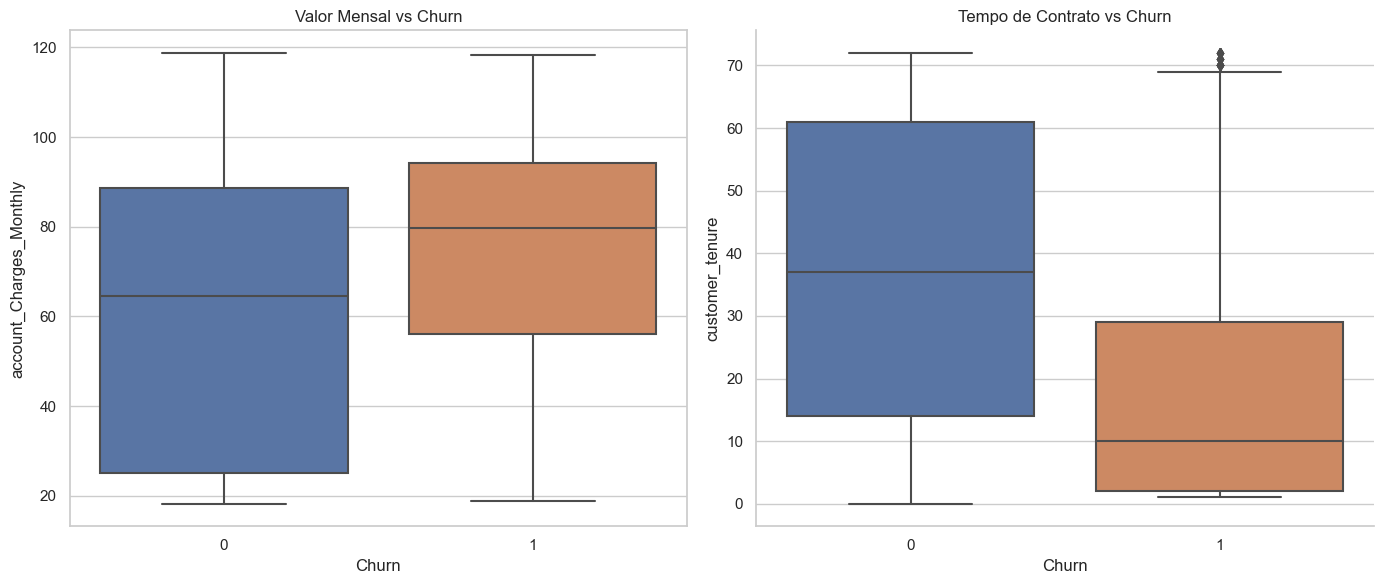

In [41]:
ta.graf_boxplot_churn(df).show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

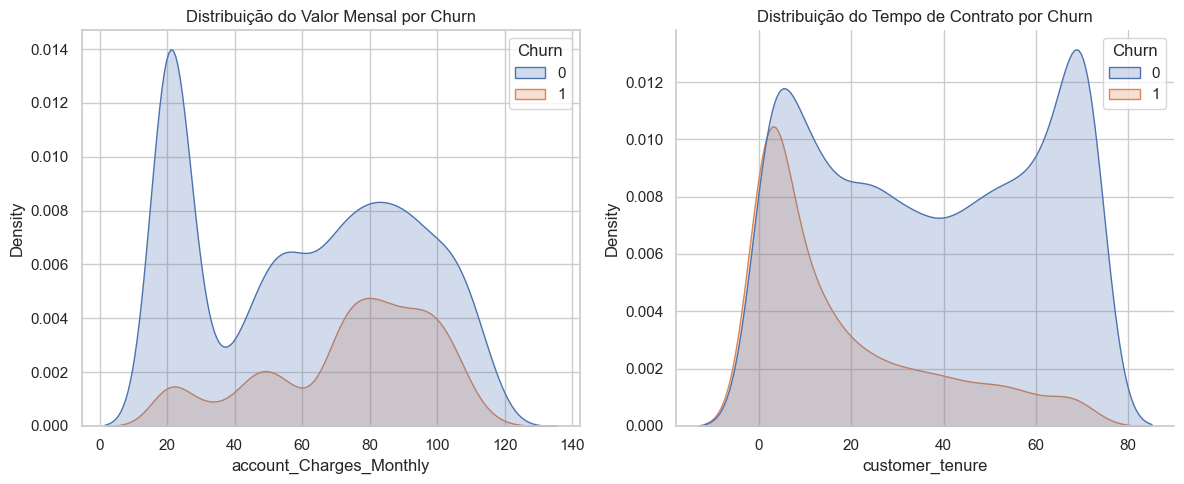

In [42]:
ta.graf_distribuicao_churn(df).show()